1.959963984540054
6.5080072030919895 7.291992796908011
(6.5080072030919895, 7.291992796908011)
5.68


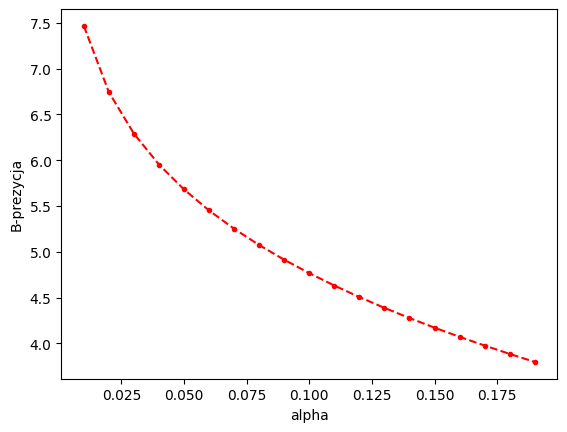

In [1]:
import math
from scipy.stats import norm
import numpy as np

x_mean = 6.9
n = 196
sigma = 2.8
alpha = 0.05

u_alpha = norm.ppf(1 - alpha/2)
print(u_alpha)
P1 = x_mean - u_alpha * sigma / math.sqrt(n)
P2 = x_mean + u_alpha * sigma / math.sqrt(n)
print(P1, P2)

confidence_interval = norm.interval(0.95, loc=x_mean, scale=sigma/np.sqrt(n))
print(confidence_interval)

B = u_alpha * sigma / (x_mean * math.sqrt(n)) * 100
print(round(B, 2))

alphas = np.arange(0, 0.2, 0.01)
B_alpha = [ norm.ppf(1 - alpha/2) * sigma / (x_mean * math.sqrt(n)) * 100  for alpha in alphas]

import matplotlib.pyplot as plt
plt.plot(alphas, B_alpha, 'r.--')
plt.xlabel("alpha")
plt.ylabel("B-prezycja")
plt.show()

dict_keys([55, 64, 50, 25, 26])
dict_values([5, 15, 25, 35, 45])


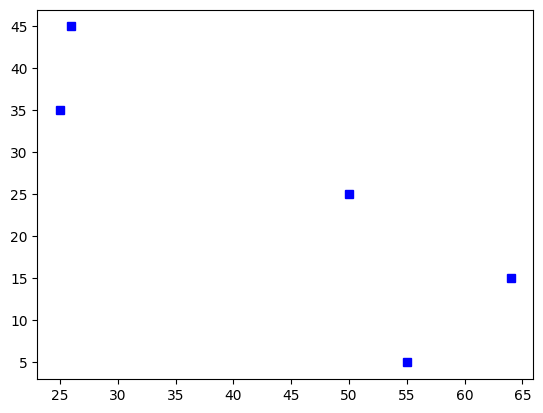

In [3]:
data = {55 : 5, 64 : 15, 50 : 25, 25 : 35, 26: 45}
print(data.keys())
print(data.values())

import matplotlib.pyplot as plt
X = list(data.keys())
Y = list(data.values())
plt.plot( X,Y, 'bs' )
plt.show()

In [4]:
import numpy as np
from scipy.stats import norm

X = list(data.values())
w = list(data.keys())

x_mean = np.average(X, weights=w)
n = sum(data.keys())
S = np.sqrt( np.sum((X-x_mean)**2) / (n-1) )
print(x_mean, n, S)

# przedial ufnosci dla sredniej
alpha = 0.01
u_alpha = norm.ppf(1 - alpha/2)
print(u_alpha)
P1 = x_mean - u_alpha * S / math.sqrt(n)
P2 = x_mean + u_alpha * S / math.sqrt(n)
print(round(P1, 2), round(P2, 2))

# przedzial ufnosci dla odchylenia
alhpa = 0.05
u_alpha = norm.ppf(1 - alpha/2)
P1 = S / (1 + u_alpha / np.sqrt(2*n))
P2 = S / (1 - u_alpha / np.sqrt(2*n))
print(P1, P2)

20.59090909090909 220 2.238313550189989
2.5758293035489004
20.2 20.98
1.993514293270629 2.5516507620563247


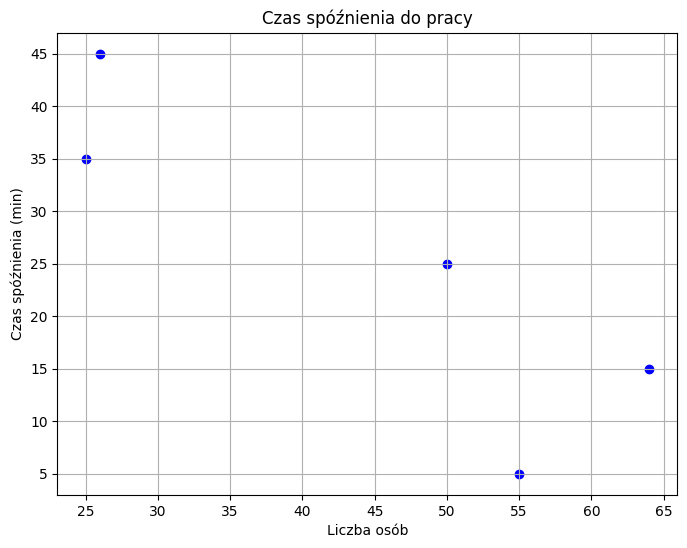

99% przedział ufności dla średniej długości spóźnienia: (-7.555867048043858, 57.55586704804386)
95% przedział ufności dla odchylenia standardowego: (11.389663906007943, 11.38966390600794)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Dane
dane = {55: 5, 64: 15, 50: 25, 25: 35, 26: 45}
liczba_osob = list(dane.keys())
czas_spóźnienia = list(dane.values())

# a) Wykres punktowy
plt.figure(figsize=(8, 6))
plt.scatter(liczba_osob, czas_spóźnienia, color='blue')
plt.title('Czas spóźnienia do pracy')
plt.xlabel('Liczba osób')
plt.ylabel('Czas spóźnienia (min)')
plt.grid(True)
plt.show()

# b) Budowanie przedziału ufności dla średniej długości spóźnienia
n = len(czas_spóźnienia)
średnia = np.mean(czas_spóźnienia)
std_dev = np.std(czas_spóźnienia, ddof=1)  # Nieobciążone odchylenie standardowe
t_score = t.ppf(0.995, df=n-1)  # Punkt odcięcia dla 99% przedziału ufności

lower_bound = średnia - t_score * (std_dev / np.sqrt(n))
upper_bound = średnia + t_score * (std_dev / np.sqrt(n))

print(f'99% przedział ufności dla średniej długości spóźnienia: ({lower_bound}, {upper_bound})')

# c) Oszacowanie przedziału odchylenia standardowego
alpha = 0.05
chi2_lower = t.ppf(alpha / 2, df=n-1)**2
chi2_upper = t.ppf(1 - alpha / 2, df=n-1)**2

lower_std = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_std = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

print(f'95% przedział ufności dla odchylenia standardowego: ({lower_std}, {upper_std})')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import chi2

data = [20, 35, 40, 17, 33, 25, 80, 45, 10]
# plt.hist(data, bins=4)
# plt.show()

x_mean = np.mean(data)
S = np.std(data)
n = len(data)
std_err = S / np.sqrt(n)
print(x_mean, S, std_err, n)

# przedzial ufnosci dla sredniej
alpha = 0.1
t_alpha = t.ppf(1 - alpha/2, n-1)
print(t_alpha)
P1 = x_mean - t_alpha * S / math.sqrt(n)
P2 = x_mean + t_alpha * S / math.sqrt(n)
print(round(P1, 2), round(P2, 2))

# przedzial ufnosci dla wariancji
alpha = 0.05
chi2_left = chi2.ppf(1-alpha/2, n-1)
chi2_right = chi2.ppf(alpha/2, n-1)

P1 = n*S**2 / chi2_left
P2 = n*S**2 / chi2_right
print(P1, P2) # wariancja
print(np.sqrt(P1), np.sqrt(P2)) # odchylenie

33.888888888888886 19.484720192695974 6.494906730898658 9
1.8595480375228421
21.81 45.97
194.8661152508914 1567.573835986652
13.959445377624835 39.592598247483735


In [7]:

heights = [125, 150, 145, 130, 155, 140, 160, 125, 155, 135]
d = 5
alpha = 0.05

# x_mean = np.mean(heights)
S = np.std(heights, ddof=1)
n = len(heights)

from scipy.stats import t
t_alpha = t.ppf(1 - alpha/2, n-1)

n = np.ceil(t_alpha**2 * S**2 / d**2)
print(n)

35.0
